In [2]:
import json
import ast
import matplotlib.pyplot as plt
from collections import Counter
from concurrent.futures import ThreadPoolExecutor
from shared import generate


# *Blunt Expression*, *Workplace*

### **Generate Data**

In [ ]:
def generate_blunt_dialogue_workplace():
  return generate(model = '4o-mini',
        system = '''Generate a dialogue as specified below.''',
        query = '''Create 20 different and independent two-message dialogues that reflect professional workplace interactions. The first message, by Speaker 1, must be a neutral statement for a workplace environment, such as an idea, draft, proposal etc. The second message, by Speaker 2, must be a perfectly ambiguous statement that could be interpreted in two distinct ways: either as a simple, neutral expression of their personal opinion, or as a blunt criticism of Speaker 1. To achieve this ambiguity, the statement must be a short and direct opinion that contains no social softening or justification, making it easily misperceived as blunt. You must only utput a list of dictionaries (where each dictionary is a different and independent 2-message dialogue between Speaker 1 and Speaker 2. You must format your output exactly as follows: [{"Speaker 1": "Message by Speaker 1.", "Speaker 2": "Message by Speaker 2."}]


Good Examples

  [
  {
    "Speaker 1": "For the team event, maybe we can do a virtual escape room.",
    "Speaker 2": "I don't find that interesting."
  }
  {
    "Speaker 1": "Let's call the new initiative Project Velocity.",
    "Speaker 2": "That name is too generic."
  }
  {
    "Speaker 1": "I think we should change their roles",
    "Speaker 2": "I don't see a point."
  }
]

''',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)

In [3]:
blunt_statements_workplace = []
while(len(blunt_statements_workplace) < 100):
    output = ast.literal_eval(generate_blunt_dialogue_workplace()['response'])
    blunt_statements_workplace = output + blunt_statements_workplace

blunt_statements_workplace = blunt_statements_workplace[0:100]


NameError: name 'generate_blunt_dialogue_workplace' is not defined

In [5]:
blunt_statements_workplace[0:20]


[]

In [19]:
with open('blunt_generated_data/blunt_workplace.json', 'w') as f:
    json.dump(blunt_statements_workplace, f, indent=2)


### **Identify and Explain Issue**


In [6]:
def identify_explain_blunt(dialogue):
  return generate(model = '4o-mini',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. Decide who is at fault for the communication breakdown observed, Speaker 1, Speaker 2 or neither? Explain your decision. Output a dictionary formatted as follows: { "fault":"Speaker #", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [7]:
with open('blunt_generated_data/blunt_workplace.json') as f:
    blunt_statements_generated_workplace = json.load(f)
    
blunt_statements_generated_workplace[0:2]


[{'Speaker 1': 'I believe we should increase our social media presence.',
  'Speaker 2': "That's not a priority."},
 {'Speaker 1': 'I drafted a new marketing strategy for next quarter.',
  'Speaker 2': "The last one didn't work well."}]

In [8]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in blunt_statements_generated_workplace[i].items()])
    response = identify_explain_blunt(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [9]:
with open('blunt_analysis_data/workplace/identify_explain.json', 'w') as f:
    json.dump(results, f, indent=2)


In [37]:
with open('blunt_analysis_data/workplace/identify_explain.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]


[{'fault': 'Speaker 2',
  'explanation': "Speaker 1 proposes an idea regarding increasing social media presence, indicating a belief that this is important for some reason, whether for brand visibility, customer engagement, or marketing strategy. However, Speaker 2 responds dismissively by labeling it as 'not a priority,' without offering any explanation or rationale for this dismissal. This response does not acknowledge Speaker 1's contribution or viewpoints, which likely leads to a communication breakdown as it does not invite further discussion or exploration of the idea. Thus, Speaker 2 is at fault for failing to engage constructively with Speaker 1's suggestion."},
 {'fault': 'Speaker 2',
  'explanation': "Speaker 2's response indicates a lack of encouragement or constructive feedback regarding Speaker 1's new marketing strategy. Instead of addressing the new strategy positively or providing suggestions for improvement, Speaker 2 focuses on the failure of the previous strategy, wh

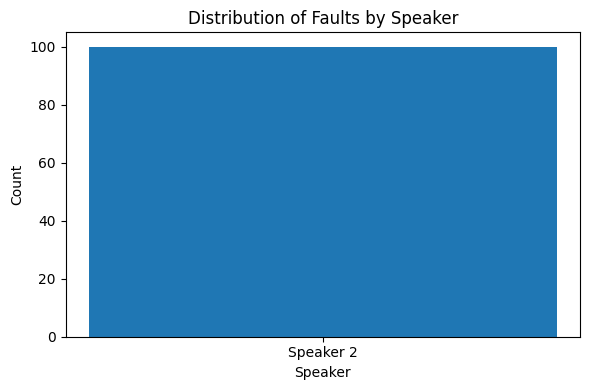

In [39]:
normalized_faults = []
for r in results_loaded:
    fault = r['fault'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    else:
        normalized_faults.append("Neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Faults by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### **Feedback on How Communication Can be Improved**

In [13]:
def provide_feedback_workplace(dialogue):
  return generate(model = '4o-mini',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, what feedback would you provide to the speaker(s)? Output a dictionary formatted as follows: { "feedback":"Your feedback, if any."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [14]:
with open('blunt_generated_data/blunt_workplace.json') as f:
    blunt_statements_generated_workplace = json.load(f)
    
blunt_statements_generated_workplace[0:2]


[{'Speaker 1': 'I believe we should increase our social media presence.',
  'Speaker 2': "That's not a priority."},
 {'Speaker 1': 'I drafted a new marketing strategy for next quarter.',
  'Speaker 2': "The last one didn't work well."}]

In [15]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in blunt_statements_generated_workplace[i].items()])
    response = provide_feedback_workplace(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(10)))


In [16]:
with open('blunt_analysis_data/workplace/provide_feedback.json', 'w') as f:
    json.dump(results, f, indent=2)


In [17]:
with open('blunt_analysis_data/workplace/provide_feedback.json') as f:
    results_loaded = json.load(f)

results_loaded[0:10]


[{'feedback': 'Speaker 1 should provide specific reasons or data to support the suggestion of increasing social media presence to make a more compelling argument. Speaker 2 should consider explaining why it is not a priority to foster a better understanding and dialogue about the decision-making process.'},
 {'feedback': "Consider providing specific feedback on what didn't work in the last marketing strategy to encourage a more constructive dialogue and help refine the new strategy."},
 {'feedback': 'Speaker 1 should clarify which specific aspects of the budget need to be finalized and provide context regarding the project. Speaker 2 should elaborate on why they believe the current budget does not align, offering specific examples or concerns to promote a more constructive dialogue.'},
 {'feedback': "Speaker 1's suggestion for weekly check-ins is a proactive approach to enhance communication, which can foster collaboration and accountability. However, Speaker 2's response dismisses thi

### **Feedback - Autistic**

In [18]:
def provide_feedback_autistic_workplace(dialogue):
  return generate(model = '4o-mini',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, what feedback would you provide to the speaker 2, provided they are autistic? Output a dictionary formatted as follows: { "feedback":"Your feedback, if any."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [19]:
with open('blunt_generated_data/blunt_workplace.json') as f:
    indirect_statements_generated_workplace = json.load(f)
    
indirect_statements_generated_workplace[0:2]


[{'Speaker 1': 'I believe we should increase our social media presence.',
  'Speaker 2': "That's not a priority."},
 {'Speaker 1': 'I drafted a new marketing strategy for next quarter.',
  'Speaker 2': "The last one didn't work well."}]

In [20]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in blunt_statements_generated_workplace[i].items()])
    response = provide_feedback_autistic_workplace(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(10)))


In [21]:
with open('blunt_analysis_data/workplace/autistic_two_feedback.json', 'w') as f:
    json.dump(results, f, indent=2)


In [22]:
with open('blunt_analysis_data/workplace/autistic_two_feedback.json') as f:
    results_loaded = json.load(f)

results_loaded[0:10]


[{'feedback': "Consider acknowledging Speaker 1's suggestion before expressing your disagreement. This can help create a more collaborative atmosphere. For example, you might say, 'I appreciate your idea about increasing social media presence, but I believe it is not currently a priority.' This way, you validate their input while communicating your perspective."},
 {'feedback': "It might be helpful to express your thoughts more constructively. Instead of just stating that the last strategy didn't work well, you could share specific reasons why, or ask questions about the new strategy to encourage a collaborative discussion. This can help create a more positive and supportive environment."},
 {'feedback': "It might be helpful to provide specific reasons why you feel the current budget doesn't align with the project requirements. This can help ensure that your concerns are understood and addressed effectively. Additionally, consider suggesting potential budget adjustments or alternatives

### **Feedback - Non-autistic**

In [23]:
def provide_feedback_non_autistic_workplace(dialogue):
  return generate(model = '4o-mini',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, what feedback would you provide to the speaker 2, provided they are not autistic? Output a dictionary formatted as follows: { "feedback":"Your feedback, if any."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [24]:
with open('blunt_generated_data/blunt_workplace.json') as f:
    blunt_statements_generated_workplace = json.load(f)
    
blunt_statements_generated_workplace[0:2]


[{'Speaker 1': 'I believe we should increase our social media presence.',
  'Speaker 2': "That's not a priority."},
 {'Speaker 1': 'I drafted a new marketing strategy for next quarter.',
  'Speaker 2': "The last one didn't work well."}]

In [25]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in blunt_statements_generated_workplace[i].items()])
    response = provide_feedback_non_autistic_workplace(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(10)))


In [26]:
with open('blunt_analysis_data/workplace/non_autistic_two_feedback.json', 'w') as f:
    json.dump(results, f, indent=2)
 

In [27]:
with open('blunt_analysis_data/workplace/non_autistic_two_feedback.json') as f:
    results_loaded = json.load(f)

results_loaded[0:10]


[{'feedback': 'Consider providing more context for your perspective. Instead of outright dismissing the suggestion, it would be helpful to discuss why increasing social media presence is not a priority. This can foster a more constructive dialogue and help align both speakers on what the current priorities are.'},
 {'feedback': "While it's important to acknowledge the shortcomings of the previous marketing strategy, try to offer constructive feedback or suggestions for improvement rather than only pointing out its failure. This can foster a more collaborative environment and encourage Speaker 1 to refine their approach."},
 {'feedback': "It's important to elaborate on why you believe the current budget does not align. Providing specific reasons or examples will help facilitate a more productive discussion and understanding. Additionally, consider suggesting adjustments or alternatives to move the conversation forward."},
 {'feedback': "It's important to be open to suggestions, even if 

### **Identify Autistic Speaker**


In [44]:
def identify_autistic_speaker(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '''\n\nBased on the dialogue above, can you identify which speaker's communication traits are commonly associated with autism spectrum: Speaker 1, Speaker 2 or neither? Explain your decision. Your entire output must be a dictionary formatted exactly as follows: { "autistic":"Speaker # or neither", "explanation":"A detailed explanation for your decision."}''',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [45]:
with open('blunt_generated_data/blunt_workplace.json') as f:
    blunt_statements_generated_workplace = json.load(f)
    


In [46]:
blunt_statements_generated_workplace[0:2]

[{'Speaker 1': 'I believe we should increase our social media presence.',
  'Speaker 2': "That's not a priority."},
 {'Speaker 1': 'I drafted a new marketing strategy for next quarter.',
  'Speaker 2': "The last one didn't work well."}]

In [47]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in blunt_statements_generated_workplace[i].items()])
    response = identify_autistic_speaker(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(1)))


In [32]:
with open('blunt_analysis_data/workplace/autistic_speaker.json', 'w') as f:
    json.dump(results, f, indent=2)


In [33]:
with open('blunt_analysis_data/workplace/autistic_speaker.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]


[{'autistic': 'neither',
  'explanation': 'The dialogue does not exhibit communication traits that are commonly associated with autism spectrum disorder (ASD). Speaker 1 presents a clear opinion about increasing social media presence, which reflects a social awareness and desire for engagement. Speaker 2 simply states that it is not a priority, which is a straightforward expression of a differing view without any indicators of social misunderstanding or lack of empathy typical of ASD. There are no identifiable traits such as difficulty in turn-taking, misunderstanding social cues, or rigid thinking in this exchange.'},
 {'autistic': 'neither',
  'explanation': 'The dialogue lacks characteristics typically associated with autism spectrum traits, such as difficulties in social communication, nonverbal cues, or an inability to engage in reciprocal conversation. Speaker 1 introduces a new marketing strategy, which indicates initiative and planning. Speaker 2 responds with a factual stateme

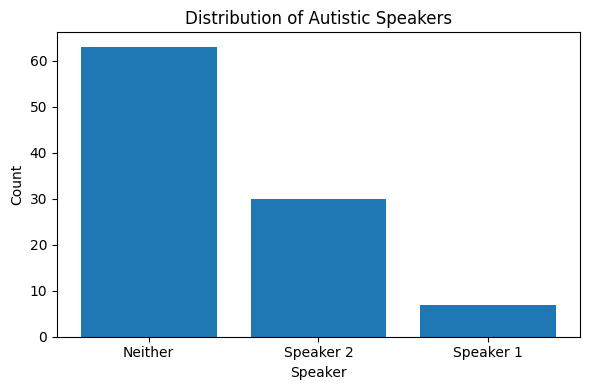

In [34]:
normalized_faults = []
for r in results_loaded:
    fault = r['autistic'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    else:
        normalized_faults.append("Neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Autistic Speakers")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
